# **Descripción del Dataset**

* **Nombre:** players_data-2024_2025.csv
* **Fuente de información:** Kaggle.
* **Número de registros:** 2752
* **Números de variables:** 267

##**Acerca del Dataset**

Estadísticas de jugadores de la temporada 2024-2025 en las Grandes 5 Ligas Europeas.

Este conjunto de datos presenta estadísticas de jugadores de la temporada 2024-2025 en las cinco mejores ligas europeas, procedentes de FBref. Actualizado automáticamente semanalmente.

## **Estadísticas de los Jugadores de Fútbol (2024-2025)**

###**Columnas relevantes**

####**Información Básica del Jugador:**

* **Player:** Nombre del jugador
* **Nation:** Nacionalidad del jugador
* **Pos:** Posición (FW, MF, DF, GK)
* **Squad:** nombre del club
* **Comp:** Liga
* **Age:** Edad del jugador
* **Born:** Año de nacimiento

#### **Tiempo de Juego y Apariciones**

* **MP:** Partidos jugados
* **Starts:** Comenzaron los juegos
* **Min:** Minutos jugados
* **90s:** Número de partidos completos de 90 minutos jugados

#### **Estadísticas de Ataque**

* **Gls:** goles marcados
* **Ast:** Ayudas proporcionadas
* **G+A:** Objetivos + Asistencias
* **xG:** Objetivos esperados
* **xAG:** Asistencias esperadas
* **npxG:** Objetivos esperados de no penalización
* **G-PK:** Objetivos excluyendo sanciones

#### **Estadísticas de Defensa**

* **Tkl:** Total aborda
* **TklW:** Tackles ganados
* **Blocks:** Bloques hechos
* **Int:** Intercepciones
* **Tkl+Int:** Tackles e intercepciones combinadas
* **Clr:** Despejamientos
* **Err:** Errores que conducen a objetivos

#### **Estadísticas de Pases y Creatividad**

* **PrgP:** Pases progresivos
* **PrgC:** Lleva progresivos
* **KP:** Paseos clave (pasos que conducen a un disparo)
* **Cmp%_stats_passing:** Porcentaje de finalización de pase
* **Ast_stats_passing:** Ayuda
* **xA:** Asistencias esperadas
* **PPA:** pasa al área de penalización

#### **Estadísticas de Porteros**

* **GA:** Objetivos concedidos
* **Saves:** Ahorros hechos
* **Save%:** Ahorra porcentaje
* **CS:** Sábanas limpias
* **CS%:** Porcentaje de hoja limpia
* **PKA:** Sanciones enfrentadas
* **PKsv:** La penalización salva

#### **Posesión y Control de Pelota**

* **Touches:** Toques totales de la pelota
* **Carries:** Total bola lleva
* **PrgR:** Carreras progresivas (lleva moviendo la pelota hacia adelante significativamente)
* **Mis:** Descontroles
* **Dis:** veces desposeídos

#### **Estadísticas diversas**

* **CrdY:** Tarjetas amarillas
* **CrdR:** Tarjetas rojas
* **PKwon:** Sanciones ganadas
* **PKcon:** Sanciones concedidas
* **Recov:** Recuperaciones de bolas

# **Fase 1: Identificar la estructura y el contenido del dataset**

## **Definir librerías**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPRegressor
from tensorflow import keras
from mpl_toolkits.mplot3d import Axes3D

## **Cargar el dataset**

In [2]:
# Cargar el dataset
df = pd.read_csv("/content/sample_data/players_data-2024_2025.csv", sep=",")

## **Mostrar las primeras filas y el resumen del dataset**

In [3]:
# Mostrar las 5 primeras filas
print("Mostrar las 5 primeras filas: ")
df.head()

Mostrar las 5 primeras filas: 


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,25.0,2000.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,MF,Valencia,es La Liga,25.0,2000.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"4,James Abankwah,ie IRL,""DF,MF"",Udinese,it Ser...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Mostrar el resumen de la estructura del dataset
print("Mostrar el resumen de la estructura del dataset")
df.info()

Mostrar el resumen de la estructura del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Columns: 267 entries, Rk to AvgDist
dtypes: float64(221), object(46)
memory usage: 5.6+ MB


In [5]:
column_types = pd.DataFrame({
    'Columna': df.columns,
    'Tipo de Dato': df.dtypes.values
})

print(column_types)


     Columna Tipo de Dato
0         Rk       object
1     Player       object
2     Nation       object
3        Pos       object
4      Squad       object
..       ...          ...
262      Stp      float64
263     Stp%      float64
264     #OPA      float64
265  #OPA/90      float64
266  AvgDist      float64

[267 rows x 2 columns]


# **Fase 2: Preprocesamiento de datos**

**Objetivo:** Limpiar y transformar los datos para que estén listos para el análisis.

In [6]:
# Ver cuántos valores nulos hay por columna
nulls = df.isnull().sum()
print(nulls[nulls > 0].sort_values(ascending=False))

CS%                   2564
PSxG/SoT              2562
Save%                 2562
AvgDist               2560
90s_stats_keeper      2559
                      ... 
Pos_stats_defense      777
Comp_stats_defense     777
90s_stats_defense      777
Tkl                    777
SCA90                  777
Length: 266, dtype: int64


A pesar de que existen muchos valores nulos por columna, se decidió **no eliminarlos**. La razón de esta decisión se debe a que en datasets deportivos como este (con estadísticas de jugadores de fútbol), es normal que muchas columnas tengan valores nulos porque no aplican a todos los jugadores.
Cada jugador desempeña una **posición distinta** en el campo (portero, defensa, mediocampista, delantero) y las métricas que se recolectan **varían mucho según esa posición**.

Supongamos que tenemos estas columnas:

* **Player:** Courtois, Van Dijk, Modric, Haaland
* **Pos:** GK, DF, MF, FW
* **Save%:** 	78.9, NaN, NaN, NaN
* **Tackles:** NaN, 45, 30, 5
* **Goals:** 0, 2, 5, 36
---------

* **Courtois** es portero, tiene Save%, pero no tiene sentido registrar sus Tackles.

* **Van Dijk** es defensa, tiene muchas entradas (Tackles), pero no hace atajadas.

* **Haaland** es delantero, mete goles pero no realiza atajadas ni muchas entradas.
------------------
Entonces, los valores nulos **no son errores**, sino que reflejan la naturaleza del juego y las responsabilidades por **posición**.

# **Fase 3: Transformación**
**Objetivo:** Convertir los datos en un formato adecuado para la minería de datos.

**Tareas:**
* Dividir el dataset en subconjuntos por rol (porteros, defensas, etc.)

* Reducir columnas irrelevantes para cada subconjunto.

* Preparar cada grupo para un análisis más específico y efectivo.

## **Crear subconjuntos del dataset por posición:**

En lugar de eliminar estas columnas con nulos, podemos agrupar el análisis por posición (Pos), para ver qué estadísticas son relevantes por grupo.

In [7]:
# Subconjunto de porteros (Goalkeepers)
porteros = df[df["Pos"] == "GK"]

# Subconjunto de defensas (Defenders)
defensas = df[df["Pos"].str.contains("DF", na=False)]

# Subconjunto de mediocampistas (Midfielders)
medios = df[df["Pos"].str.contains("MF", na=False)]

# Subconjunto de delanteros (Forwards)
delanteros = df[df["Pos"].str.contains("FW", na=False)]

In [8]:
# Ver cuántos jugadores hay por posición
print("Porteros:", len(porteros))
print("Defensas:", len(defensas))
print("Mediocampistas:", len(medios))
print("Delanteros:", len(delanteros))

Porteros: 193
Defensas: 834
Mediocampistas: 587
Delanteros: 361


## **Ver cuántas columnas útiles hay por grupo**

In [9]:
# Función para contar columnas con menos de cierto % de valores nulos
def columnas_utiles(df, umbral=0.5):
    total_filas = len(df)
    return df.isnull().mean()[df.isnull().mean() < umbral].index.tolist()

# Calcular columnas útiles para cada grupo
columnas_gk = columnas_utiles(porteros)
columnas_df = columnas_utiles(defensas)
columnas_mf = columnas_utiles(medios)
columnas_fw = columnas_utiles(delanteros)

# Mostrar conteo
print("Columnas útiles - Porteros:", len(columnas_gk))
print("Columnas útiles - Defensas:", len(columnas_df))
print("Columnas útiles - Mediocampistas:", len(columnas_mf))
print("Columnas útiles - Delanteros:", len(columnas_fw))


Columnas útiles - Porteros: 259
Columnas útiles - Defensas: 214
Columnas útiles - Mediocampistas: 214
Columnas útiles - Delanteros: 214


## **Obtener las columnas útiles por cada grupo**

In [10]:
# Función para obtener columnas útiles
def columnas_utiles(df_subset, threshold=1):
    return df_subset.loc[:, df_subset.notna().sum() >= threshold].columns.tolist()

# Listar columnas útiles por grupo
columnas_porteros = columnas_utiles(porteros)
columnas_defensas = columnas_utiles(defensas)
columnas_mediocampistas = columnas_utiles(medios)
columnas_delanteros = columnas_utiles(delanteros)

# Mostrar resultados
print("Columnas útiles para Porteros (GK):", len(columnas_porteros))
print(columnas_porteros)
print("\n Columnas útiles para Defensas (DF):", len(columnas_defensas))
print(columnas_defensas)
print("\n Columnas útiles para Mediocampistas (MF):", len(columnas_mediocampistas))
print(columnas_mediocampistas)
print("\n Columnas útiles para Delanteros (FW):", len(columnas_delanteros))
print(columnas_delanteros)


Columnas útiles para Porteros (GK): 267
['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'G+A-PK', 'xG+xAG', 'Rk_stats_shooting', 'Nation_stats_shooting', 'Pos_stats_shooting', 'Comp_stats_shooting', 'Age_stats_shooting', 'Born_stats_shooting', '90s_stats_shooting', 'Gls_stats_shooting', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK_stats_shooting', 'PKatt_stats_shooting', 'xG_stats_shooting', 'npxG_stats_shooting', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Rk_stats_passing', 'Nation_stats_passing', 'Pos_stats_passing', 'Comp_stats_passing', 'Age_stats_passing', 'Born_stats_passing', '90s_stats_passing', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Ast_stats_passing', 'xAG_stats_passing', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP_stats_passing', 'Rk_stats_passing_types', 'Nation_stats_passing_types'

En el grupo de los porteros están saliendo **267 columnas útiles** para los porteros (GK) es decir, todas las columnas del dataset original, eso probablemente significa que para al menos una fila de portero hay un valor no nulo en cada columna.

Los porteros podrían tener valores nulos en la mayoría de columnas ofensivas/defensivas, pero si al menos uno de ellos tiene un valor en esas columnas, entonces esa columna ya cuenta como "útil" bajo este criterio de notna().sum() >= 1.

## **Ajustar el umbral**

In [11]:
def columnas_utiles(df_subset, threshold_ratio=0.05):
    threshold = int(len(df_subset) * threshold_ratio)
    return df_subset.loc[:, df_subset.notna().sum() > threshold].columns.tolist()

# Listar columnas útiles por grupo
columnas_porteros = columnas_utiles(porteros)
columnas_defensas = columnas_utiles(defensas)
columnas_mediocampistas = columnas_utiles(medios)
columnas_delanteros = columnas_utiles(delanteros)

# Mostrar resultados
print("Columnas útiles para Porteros (GK):", len(columnas_porteros))
print(columnas_porteros)
print("\n Columnas útiles para Defensas (DF):", len(columnas_defensas))
print(columnas_defensas)
print("\n Columnas útiles para Mediocampistas (MF):", len(columnas_mediocampistas))
print(columnas_mediocampistas)
print("\n Columnas útiles para Delanteros (FW):", len(columnas_delanteros))
print(columnas_delanteros)

Columnas útiles para Porteros (GK): 262
['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'G+A-PK', 'xG+xAG', 'Rk_stats_shooting', 'Nation_stats_shooting', 'Pos_stats_shooting', 'Comp_stats_shooting', 'Age_stats_shooting', 'Born_stats_shooting', '90s_stats_shooting', 'Gls_stats_shooting', 'Sh', 'SoT', 'Sh/90', 'SoT/90', 'FK', 'PK_stats_shooting', 'PKatt_stats_shooting', 'xG_stats_shooting', 'npxG_stats_shooting', 'G-xG', 'np:G-xG', 'Rk_stats_passing', 'Nation_stats_passing', 'Pos_stats_passing', 'Comp_stats_passing', 'Age_stats_passing', 'Born_stats_passing', '90s_stats_passing', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Ast_stats_passing', 'xAG_stats_passing', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP_stats_passing', 'Rk_stats_passing_types', 'Nation_stats_passing_types', 'Pos_stats_passing_types', 'Comp_stats_pas

Este resultado indica que de las 267 columnas totales **262 columnas** tienen datos presentes en al menos el 5% de los porteros.

Las otras 5 columnas tienen valores muy escasos o nulos en casi todos los porteros, así que pueden descartarse al analizar este grupo.

## **Ajustar columnas numéricas útiles para cada subconjunto**

In [13]:
# 1. Detectar columnas numéricas de las columnas útiles
columnas_numericas_porteros = porteros[columnas_porteros].select_dtypes(include='number').columns.tolist()
columnas_numericas_defensas = defensas[columnas_defensas].select_dtypes(include='number').columns.tolist()
columnas_numericas_medios = medios[columnas_mediocampistas].select_dtypes(include='number').columns.tolist()
columnas_numericas_delanteros = delanteros[columnas_delanteros].select_dtypes(include='number').columns.tolist()

# 2. Mostrar cuántas columnas útiles son numéricas
print(f"Columnas numéricas útiles en porteros: {len(columnas_numericas_porteros)}")
print(columnas_numericas_porteros)

print(f"Columnas numéricas útiles en defensas: {len(columnas_numericas_defensas)}")
print(columnas_numericas_defensas)

print(f"Columnas numéricas útiles en mediocampistas: {len(columnas_numericas_medios)}")
print(columnas_numericas_medios)

print(f"Columnas numéricas útiles en delanteros: {len(columnas_numericas_delanteros)}")
print(columnas_numericas_delanteros)


Columnas numéricas útiles en porteros: 216
['Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'G+A-PK', 'xG+xAG', 'Rk_stats_shooting', 'Born_stats_shooting', '90s_stats_shooting', 'Gls_stats_shooting', 'Sh', 'SoT', 'Sh/90', 'SoT/90', 'FK', 'PK_stats_shooting', 'PKatt_stats_shooting', 'xG_stats_shooting', 'npxG_stats_shooting', 'G-xG', 'np:G-xG', 'Rk_stats_passing', 'Born_stats_passing', '90s_stats_passing', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Ast_stats_passing', 'xAG_stats_passing', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP_stats_passing', 'Rk_stats_passing_types', 'Born_stats_passing_types', '90s_stats_passing_types', 'Att_stats_passing_types', 'Live', 'Dead', 'FK_stats_passing_types', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Cmp_stats_passing_types', 'Off', 'Blocks', 'Rk_stats_gca', 'Born_stats_gca', '90s_stats_gca', 'SCA', 'SCA90', 'PassLive', '

# **Fase 4: Minería de datos**

## **Clustering de porteros**

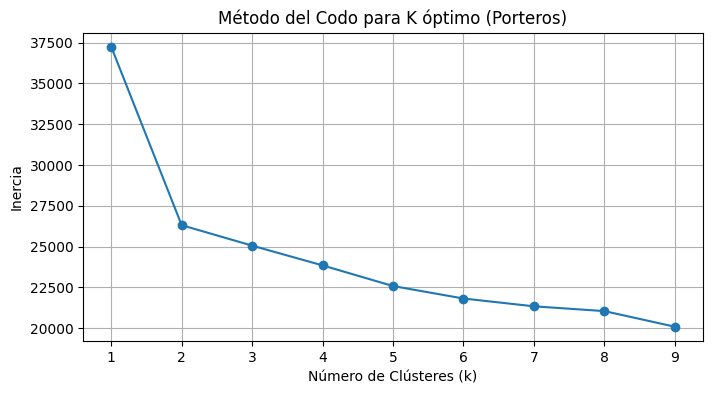

<ipython-input-33-a73955bdd84f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porteros['cluster'] = kmeans.fit_predict(porteros_scaled)


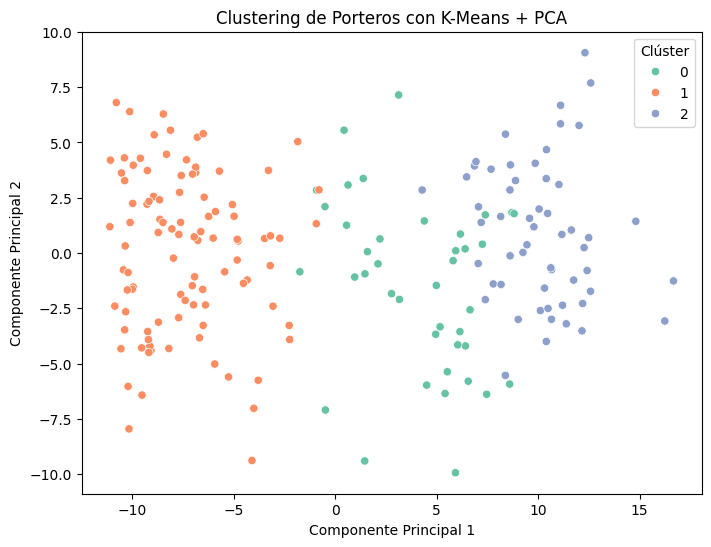


Distribución de porteros por clúster:
cluster
1    98
2    55
0    40
Name: count, dtype: int64

Promedio por cluster (solo columnas numéricas):
               Age         Born         MP     Starts          Min        90s  \
cluster                                                                         
0        29.825000  1994.425000  20.200000  20.125000  1797.875000  19.977500   
1        28.530612  1995.755102   4.806122   4.540816   417.979592   4.644898   
2        28.618182  1995.690909  25.418182  25.418182  2280.345455  25.336364   

         Gls       Ast       G+A  G-PK  ...    Att (GK)         Thr  \
cluster                                 ...                           
0        0.0  0.125000  0.125000   0.0  ...  567.875000   86.775000   
1        0.0  0.010204  0.010204   0.0  ...  133.551020   18.836735   
2        0.0  0.127273  0.127273   0.0  ...  784.509091  103.454545   

           Launch%     AvgLen         Opp        Stp      Stp%       #OPA  \
cluster        

In [ ]:
# 1. Preparación de datos
# porteros_filtrado = porteros[columnas_porteros].dropna()
porteros_filtrado_numericas = porteros[columnas_porteros].select_dtypes(include='number')

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
porteros_imputado = imputer.fit_transform(porteros_filtrado_numericas)

scaler = StandardScaler()
porteros_scaled = scaler.fit_transform(porteros_imputado)

# 2. Método del codo para determinar K
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(porteros_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo para K óptimo (Porteros)')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# 3. Aplicar K-Means con el K elegido
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
porteros['cluster'] = kmeans.fit_predict(porteros_scaled)

# 4. Reducción de dimensiones para visualización
pca = PCA(n_components=2)
pca_result = pca.fit_transform(porteros_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=porteros['cluster'], palette='Set2')
plt.title('Clustering de Porteros con K-Means + PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()

# 5. Análisis por clúster
print("\nDistribución de porteros por clúster:")
print(porteros['cluster'].value_counts())

print("\nPromedio por cluster (solo columnas numéricas):")
print(porteros.groupby('cluster')[columnas_numericas_porteros].mean())


## **Clustering de Defensas**

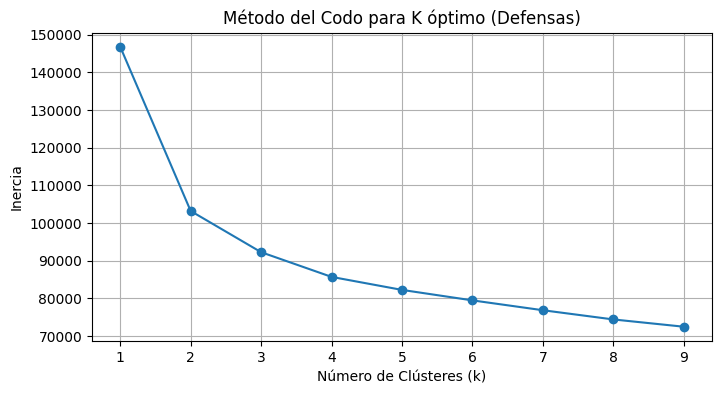

<ipython-input-14-3fe42f809d67>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defensas['cluster'] = kmeans.fit_predict(defensas_scaled)


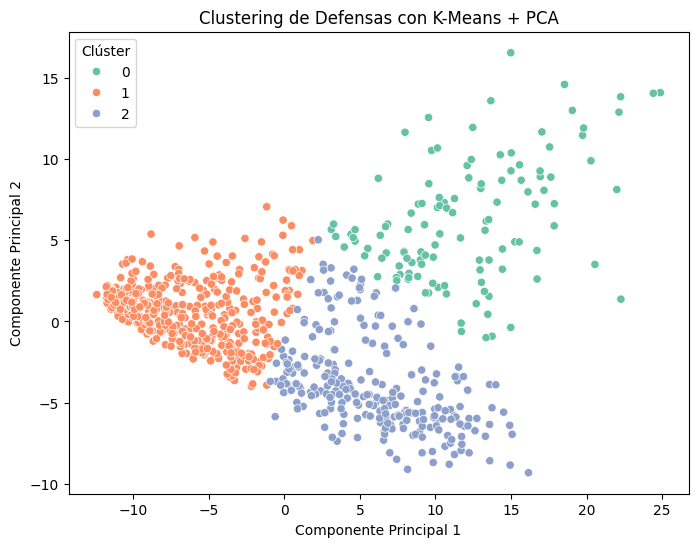


Distribución de defensas por clúster:
cluster
1    457
2    258
0    119
Name: count, dtype: int64

Promedio por cluster (solo columnas numéricas):
               Age         Born         MP     Starts          Min        90s  \
cluster                                                                         
0        26.672269  1997.554622  24.252101  21.663866  1900.941176  21.117647   
1        25.361842  1998.953947   8.122538   4.943107   457.636761   5.082932   
2        27.275194  1996.992248  21.658915  19.798450  1756.476744  19.517054   

              Gls       Ast       G+A      G-PK  ...  Crs_stats_misc  \
cluster                                          ...                   
0        0.957983  2.268908  3.226891  0.907563  ...       67.789916   
1        0.153173  0.183807  0.336980  0.153173  ...        6.030635   
2        0.810078  0.534884  1.344961  0.786822  ...        8.170543   

         Int_stats_misc  TklW_stats_misc     PKwon     PKcon        OG  \
cluster   

In [14]:
# 1. Preparación de datos
defensas_filtrado_numericas = defensas[columnas_defensas].select_dtypes(include='number')

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
defensas_imputado = imputer.fit_transform(defensas_filtrado_numericas)

scaler = StandardScaler()
defensas_scaled = scaler.fit_transform(defensas_imputado)

# 2. Método del codo para determinar K
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(defensas_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo para K óptimo (Defensas)')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# 3. Aplicar K-Means con el K elegido
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
defensas['cluster'] = kmeans.fit_predict(defensas_scaled)

# 4. Reducción de dimensiones para visualización
pca = PCA(n_components=2)
pca_result = pca.fit_transform(defensas_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=defensas['cluster'], palette='Set2')
plt.title('Clustering de Defensas con K-Means + PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()

# 5. Análisis por clúster
print("\nDistribución de defensas por clúster:")
print(defensas['cluster'].value_counts())

print("\nPromedio por cluster (solo columnas numéricas):")
print(defensas.groupby('cluster')[columnas_numericas_defensas].mean())

## **Clustering para mediocampistas**

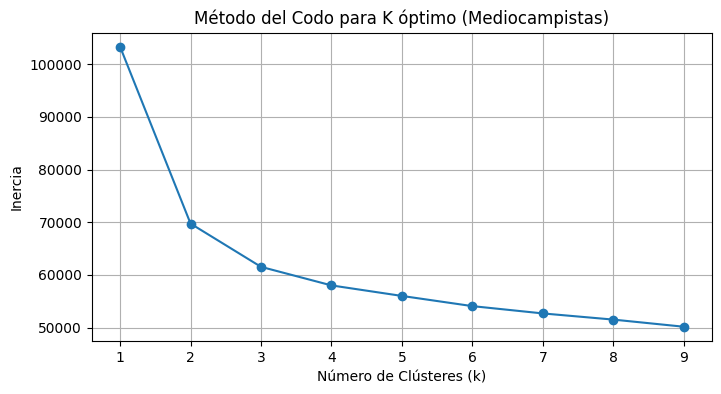

<ipython-input-17-b9a0c2c89081>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medios['cluster'] = kmeans.fit_predict(medios_scaled)


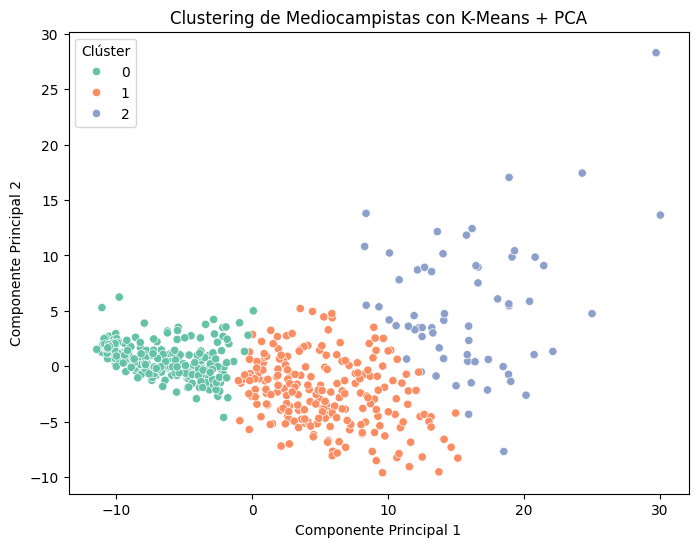


Distribución de mediocampistas por clúster:
cluster
0    302
1    222
2     63
Name: count, dtype: int64

Promedio por cluster (solo columnas numéricas):
               Age         Born         MP     Starts          Min        90s  \
cluster                                                                         
0        24.417219  1999.923841   7.420530   2.794702   279.880795   3.105629   
1        26.301802  1998.004505  21.837838  17.112613  1479.175676  16.434234   
2        26.698413  1997.523810  24.904762  22.301587  1923.968254  21.374603   

              Gls       Ast       G+A      G-PK  ...  Crs_stats_misc  \
cluster                                          ...                   
0        0.208609  0.225166  0.433775  0.198675  ...        4.559603   
1        1.099099  1.072072  2.171171  0.977477  ...       16.603604   
2        4.174603  3.650794  7.825397  3.793651  ...       58.714286   

         Int_stats_misc  TklW_stats_misc     PKwon     PKcon        OG  \
clus

In [17]:
# 1. Preparación de datos
medios_filtrado_numericas = medios[columnas_mediocampistas].select_dtypes(include='number')

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
medios_imputado = imputer.fit_transform(medios_filtrado_numericas)

scaler = StandardScaler()
medios_scaled = scaler.fit_transform(medios_imputado)

# 2. Método del codo para determinar K
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(medios_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo para K óptimo (Mediocampistas)')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# 3. Aplicar K-Means con el K elegido
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
medios['cluster'] = kmeans.fit_predict(medios_scaled)

# 4. Reducción de dimensiones para visualización
pca = PCA(n_components=2)
pca_result = pca.fit_transform(medios_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=medios['cluster'], palette='Set2')
plt.title('Clustering de Mediocampistas con K-Means + PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()

# 5. Análisis por clúster
print("\nDistribución de mediocampistas por clúster:")
print(medios['cluster'].value_counts())

print("\nPromedio por cluster (solo columnas numéricas):")
print(medios.groupby('cluster')[columnas_numericas_medios].mean())

## **Clustering par delanteros**

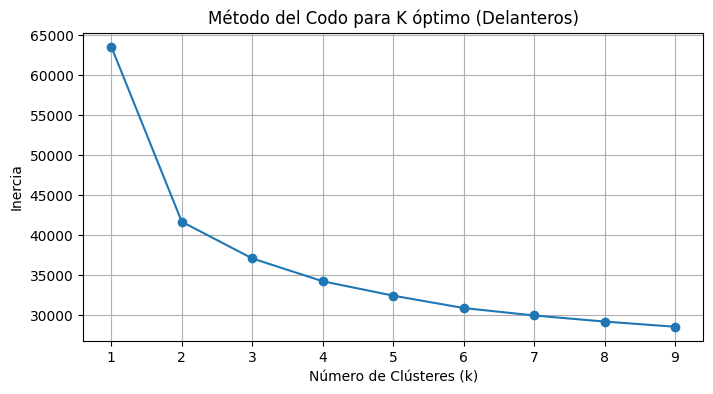

<ipython-input-18-48d343eac2b5>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delanteros['cluster'] = kmeans.fit_predict(delanteros_scaled)


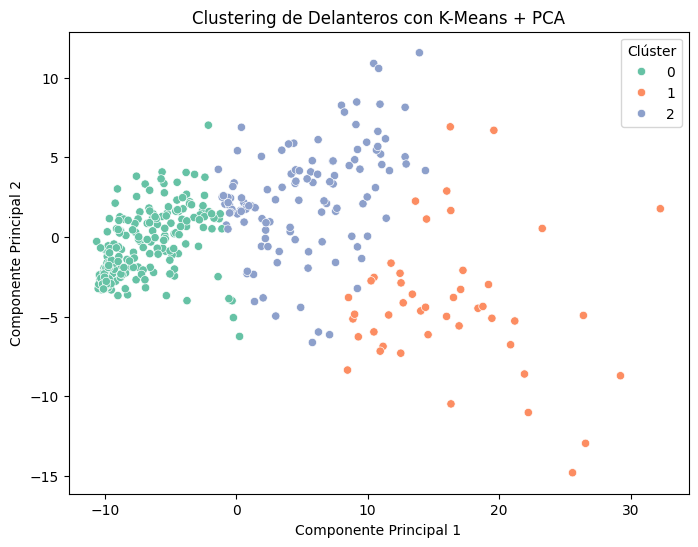


Distribución de delanteros por clúster:
cluster
0    197
2    118
1     46
Name: count, dtype: int64

Promedio por cluster (solo columnas numéricas):
               Age         Born         MP     Starts          Min        90s  \
cluster                                                                         
0        24.443878  1999.867347   7.756345   2.416244   258.989848   2.876142   
1        26.195652  1998.086957  25.195652  20.934783  1803.391304  20.039130   
2        26.796610  1997.491525  22.449153  16.144068  1406.822034  15.635593   

              Gls       Ast        G+A      G-PK  ...  Crs_stats_misc  \
cluster                                           ...                   
0        0.837563  0.294416   1.131980  0.761421  ...        2.994924   
1        8.630435  4.695652  13.326087  7.543478  ...       61.065217   
2        6.533898  1.898305   8.432203  5.720339  ...       11.406780   

         Int_stats_misc  TklW_stats_misc     PKwon     PKcon        OG  \
clu

In [18]:
# 1. Preparación de datos
delanteros_filtrado_numericas = delanteros[columnas_delanteros].select_dtypes(include='number')

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
delanteros_imputado = imputer.fit_transform(delanteros_filtrado_numericas)

scaler = StandardScaler()
delanteros_scaled = scaler.fit_transform(delanteros_imputado)

# 2. Método del codo para determinar K
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(delanteros_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo para K óptimo (Delanteros)')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# 3. Aplicar K-Means con el K elegido
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
delanteros['cluster'] = kmeans.fit_predict(delanteros_scaled)

# 4. Reducción de dimensiones para visualización
pca = PCA(n_components=2)
pca_result = pca.fit_transform(delanteros_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=delanteros['cluster'], palette='Set2')
plt.title('Clustering de Delanteros con K-Means + PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()

# 5. Análisis por clúster
print("\nDistribución de delanteros por clúster:")
print(delanteros['cluster'].value_counts())

print("\nPromedio por cluster (solo columnas numéricas):")
print(delanteros.groupby('cluster')[columnas_numericas_delanteros].mean())

## **Agrupación de estadísticas clave por clúster**

### **Porteros**

<ipython-input-23-0831de3b8653>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porteros['cluster'] = kmeans.fit_predict(porteros_scaled)


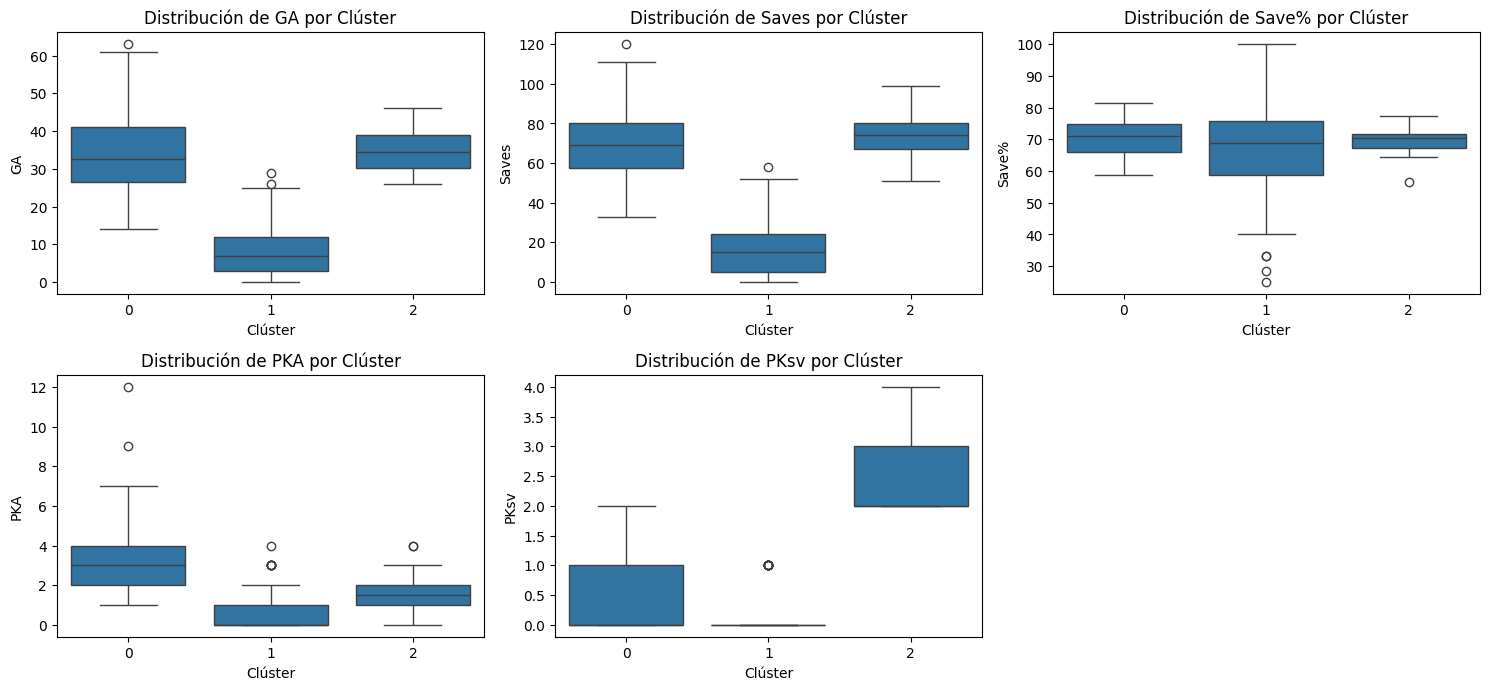

In [23]:
# Filtrar porteros (GK) y seleccionar columnas útiles
columnas_utiles_porteros = ['GA', 'Saves', 'Save%', 'PKA', 'PKsv']
porteros = df[df['Pos'] == 'GK']

# Filtrar las columnas útiles y asegurarnos de que están en formato numérico
porteros_filtrado_numericas = porteros[columnas_utiles_porteros].select_dtypes(include='number')

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
porteros_imputado = imputer.fit_transform(porteros_filtrado_numericas)

# Normalizar los datos
scaler = StandardScaler()
porteros_scaled = scaler.fit_transform(porteros_imputado)

# Aplicar K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
porteros['cluster'] = kmeans.fit_predict(porteros_scaled)

# Crear un gráfico de cajas (boxplot) para cada variable clave
variables_clave_porteros = ['GA', 'Saves', 'Save%', 'PKA', 'PKsv']
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_clave_porteros):
    plt.subplot(3, 3, i + 1)  # Crear un gráfico en una cuadrícula de 3x3
    sns.boxplot(x='cluster', y=var, data=porteros)  # Crear el boxplot para cada variable
    plt.title(f"Distribución de {var} por Clúster")
    plt.xlabel("Clúster")
    plt.ylabel(var)

plt.tight_layout()
plt.show()


### **Defensas**

<ipython-input-24-fb004f67614d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defensas['cluster'] = kmeans.fit_predict(defensas_scaled)


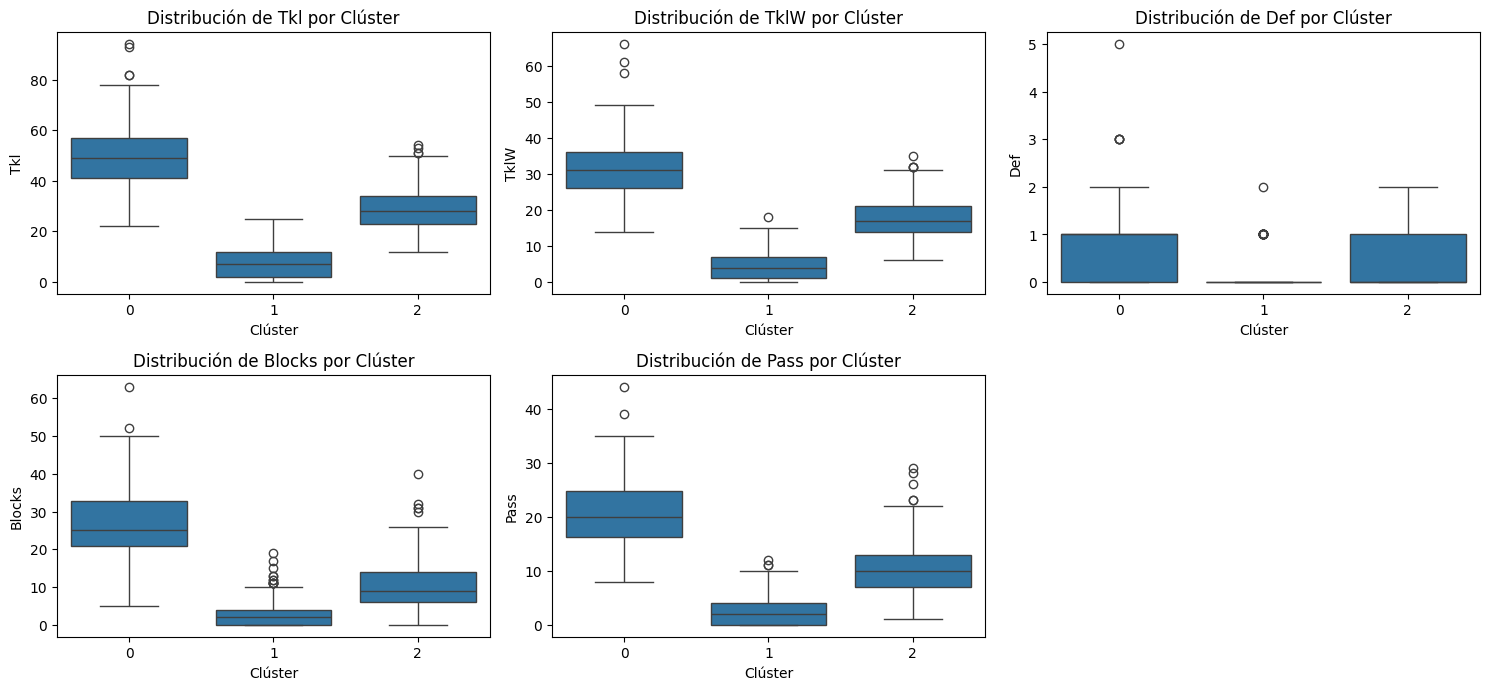

In [24]:
# Filtrar defensas (DF) y seleccionar columnas útiles
columnas_utiles_defensas = ['Tkl', 'TklW', 'Def', 'Blocks', 'Pass']
defensas = df[df['Pos'] == 'DF']

# Filtrar las columnas útiles y asegurarnos de que están en formato numérico
defensas_filtrado_numericas = defensas[columnas_utiles_defensas].select_dtypes(include='number')

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
defensas_imputado = imputer.fit_transform(defensas_filtrado_numericas)

# Normalizar los datos
scaler = StandardScaler()
defensas_scaled = scaler.fit_transform(defensas_imputado)

# Aplicar K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
defensas['cluster'] = kmeans.fit_predict(defensas_scaled)

# Crear un gráfico de cajas (boxplot) para cada variable clave
variables_clave_defensas = ['Tkl', 'TklW', 'Def', 'Blocks', 'Pass']
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_clave_defensas):
    plt.subplot(3, 3, i + 1)  # Crear un gráfico en una cuadrícula de 3x3
    sns.boxplot(x='cluster', y=var, data=defensas)  # Crear el boxplot para cada variable
    plt.title(f"Distribución de {var} por Clúster")
    plt.xlabel("Clúster")
    plt.ylabel(var)

plt.tight_layout()
plt.show()

### **Mediocampistas**

<ipython-input-25-9fbb85bd4ff2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediocampistas['cluster'] = kmeans.fit_predict(mediocampistas_scaled)


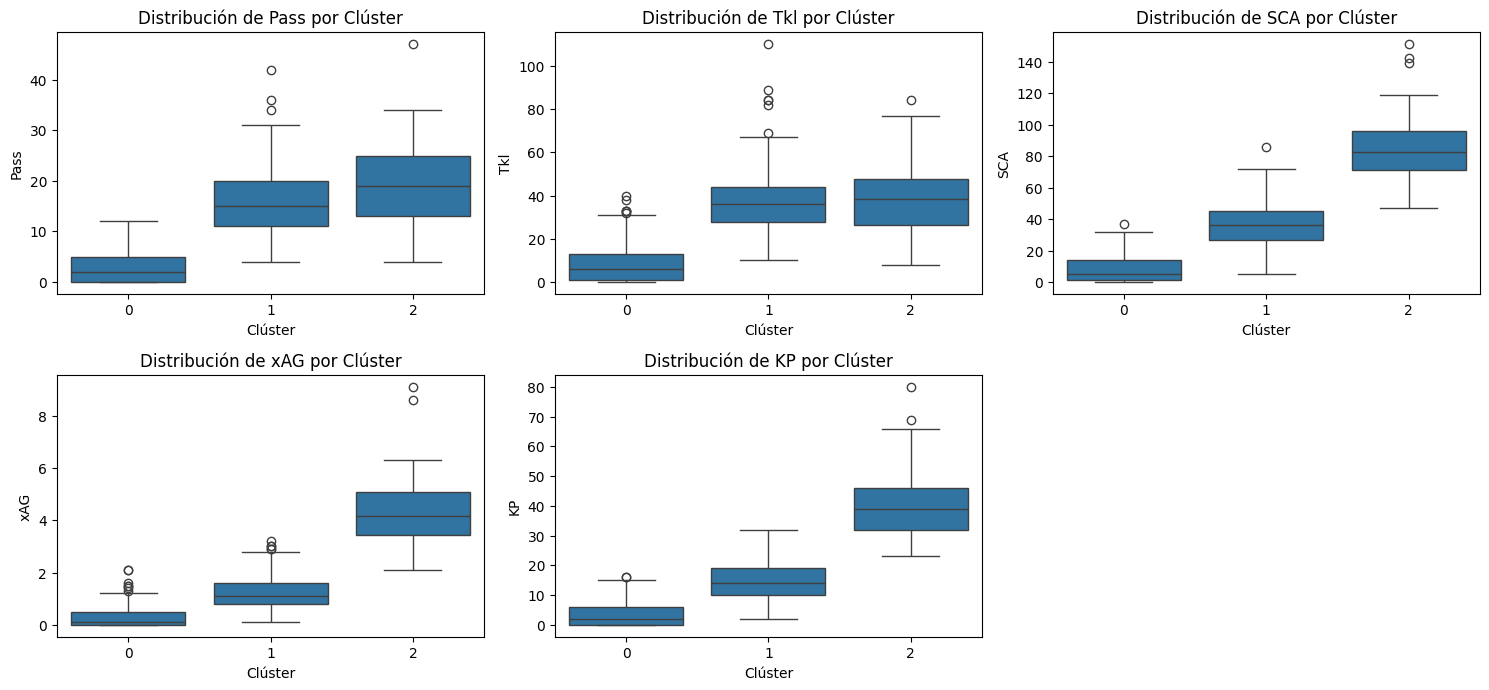

In [25]:
# Filtrar mediocampistas (MF) y seleccionar columnas útiles
columnas_utiles_mediocampistas = ['Pass', 'Tkl', 'SCA', 'xAG', 'KP']
mediocampistas = df[df['Pos'] == 'MF']

# Filtrar las columnas útiles y asegurarnos de que están en formato numérico
mediocampistas_filtrado_numericas = mediocampistas[columnas_utiles_mediocampistas].select_dtypes(include='number')

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
mediocampistas_imputado = imputer.fit_transform(mediocampistas_filtrado_numericas)

# Normalizar los datos
scaler = StandardScaler()
mediocampistas_scaled = scaler.fit_transform(mediocampistas_imputado)

# Aplicar K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
mediocampistas['cluster'] = kmeans.fit_predict(mediocampistas_scaled)

# Crear un gráfico de cajas (boxplot) para cada variable clave
variables_clave_mediocampistas = ['Pass', 'Tkl', 'SCA', 'xAG', 'KP']
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_clave_mediocampistas):
    plt.subplot(3, 3, i + 1)  # Crear un gráfico en una cuadrícula de 3x3
    sns.boxplot(x='cluster', y=var, data=mediocampistas)  # Crear el boxplot para cada variable
    plt.title(f"Distribución de {var} por Clúster")
    plt.xlabel("Clúster")
    plt.ylabel(var)

plt.tight_layout()
plt.show()

### **Delanteros**

<ipython-input-26-50098e5d1ba1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delanteros['cluster'] = kmeans.fit_predict(delanteros_scaled)


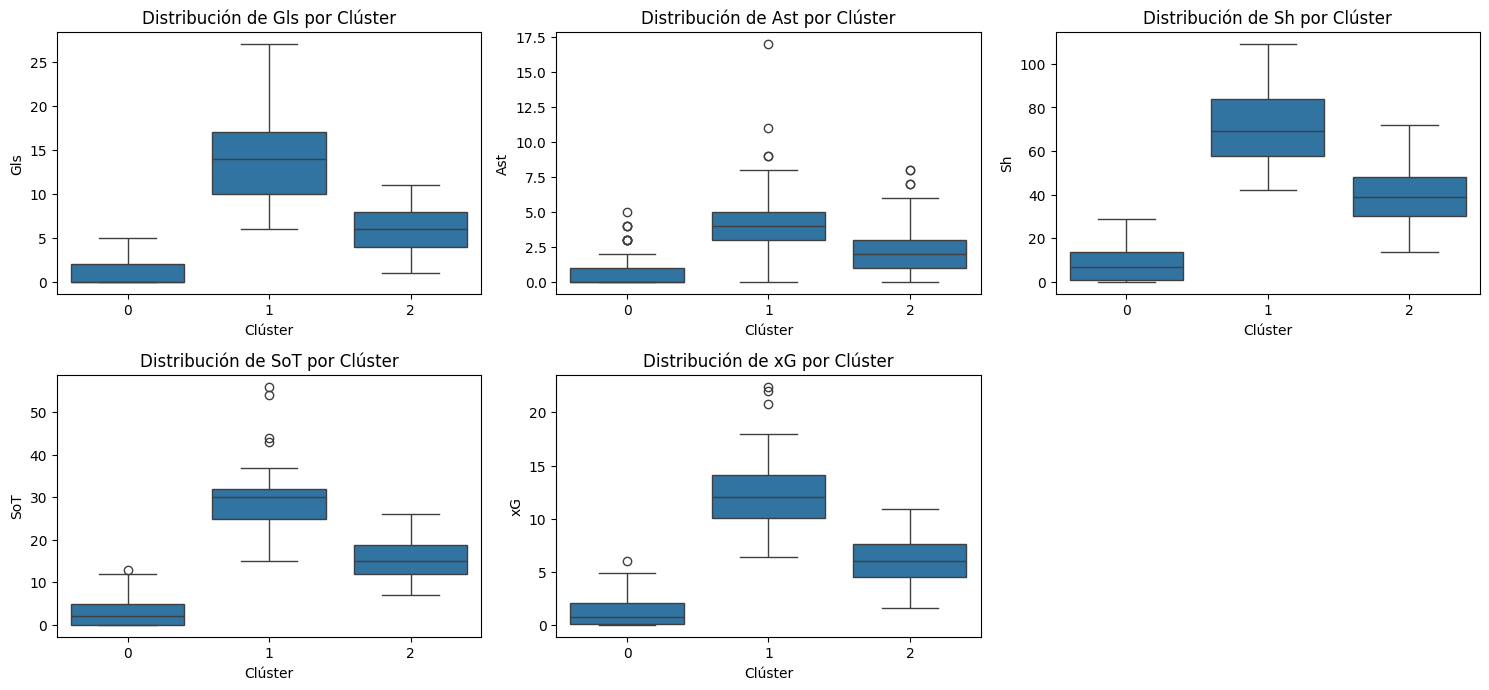

In [26]:
# Filtrar delanteros (FW) y seleccionar columnas útiles
columnas_utiles_delanteros = ['Gls', 'Ast', 'Sh', 'SoT', 'xG']
delanteros = df[df['Pos'] == 'FW']

# Filtrar las columnas útiles y asegurarnos de que están en formato numérico
delanteros_filtrado_numericas = delanteros[columnas_utiles_delanteros].select_dtypes(include='number')

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
delanteros_imputado = imputer.fit_transform(delanteros_filtrado_numericas)

# Normalizar los datos
scaler = StandardScaler()
delanteros_scaled = scaler.fit_transform(delanteros_imputado)

# Aplicar K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
delanteros['cluster'] = kmeans.fit_predict(delanteros_scaled)

# Crear un gráfico de cajas (boxplot) para cada variable clave
variables_clave_delanteros = ['Gls', 'Ast', 'Sh', 'SoT', 'xG']
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_clave_delanteros):
    plt.subplot(3, 3, i + 1)  # Crear un gráfico en una cuadrícula de 3x3
    sns.boxplot(x='cluster', y=var, data=delanteros)  # Crear el boxplot para cada variable
    plt.title(f"Distribución de {var} por Clúster")
    plt.xlabel("Clúster")
    plt.ylabel(var)

plt.tight_layout()
plt.show()

## **Modelos predictivos**

Se usan los **goles (Gls)** como variable objetivo y las columnas de características que se han identificado como útiles.

In [30]:
# Definir variables predictoras (X) y la variable objetivo (y) para predecir los goles (Gls)
X = delanteros_filtrado_numericas
y = delanteros['Gls']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 3. Red Neuronal (MLP Regressor)
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

# Evaluar los modelos
def evaluar_modelo(model, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Evaluación de los modelos
mse_lr, mae_lr, r2_lr = evaluar_modelo(lr_model, y_test, y_pred_lr)
mse_rf, mae_rf, r2_rf = evaluar_modelo(rf_model, y_test, y_pred_rf)
mse_mlp, mae_mlp, r2_mlp = evaluar_modelo(mlp_model, y_test, y_pred_mlp)

# Mostrar resultados
print("Regresión Lineal:")
print(f"MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}\n")

print("Random Forest Regressor:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}\n")

print("Red Neuronal (MLP Regressor):")
print(f"MSE: {mse_mlp}, MAE: {mae_mlp}, R²: {r2_mlp}\n")

Regresión Lineal:
MSE: 3.8427488178878e-30, MAE: 1.2041556933410997e-15, R²: 1.0

Random Forest Regressor:
MSE: 0.0014808219178082203, MAE: 0.012739726027397256, R²: 0.9999277565182364

Red Neuronal (MLP Regressor):
MSE: 0.008195890546867961, MAE: 0.05410680103854738, R²: 0.9996001547099361



## **Corrección de posibles sobreajustes**

**Validación Cruzada (Cross-Validation)**

In [32]:
# 1. Validación cruzada para la regresión lineal
cv_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Regresión Lineal - Validación cruzada MSE:", np.mean(cv_lr))

# 2. Validación cruzada para Random Forest Regressor
cv_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Random Forest - Validación cruzada MSE:", np.mean(cv_rf))

# 3. Validación cruzada para MLP Regressor
cv_mlp = cross_val_score(mlp_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Red Neuronal - Validación cruzada MSE:", np.mean(cv_mlp))


Regresión Lineal - Validación cruzada MSE: -1.7563760613016327e-29
Random Forest - Validación cruzada MSE: -0.1933591046581971
Red Neuronal - Validación cruzada MSE: -0.00880331830932206


**Ajuste de Hiperparámetros usando GridSearchCV**

In [34]:
# 1. Ajuste de hiperparámetros para Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
print("Mejores parámetros para Random Forest:", grid_rf.best_params_)

# 2. Ajuste de hiperparámetros para MLP Regressor
mlp_param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_mlp = GridSearchCV(MLPRegressor(max_iter=1000, random_state=42), mlp_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_mlp.fit(X_train, y_train)
print("Mejores parámetros para Red Neuronal:", grid_mlp.best_params_)


Mejores parámetros para Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Mejores parámetros para Red Neuronal: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (128, 64)}


# **Fase 5: Evaluación e Interpretación**
Se analizan los resultados obtenidos para extraer conclusiones útiles y validadas por expertos.

**Análisis de los resultados de los modelos:**

* **Regresión Lineal**

  Si bien tiene un excelente rendimiento en términos de MSE y R², este modelo puede estar sobreajustando. Esto significa que su rendimiento perfecto en el conjunto de entrenamiento no se traduce necesariamente en un modelo robusto. En un contexto real, podría no generalizar bien a datos nuevos o situaciones imprevistas.

* **Random Forest**

 Este modelo ha mostrado un bajo MSE, bajo MAE, y un alto R², lo que sugiere que está proporcionando predicciones muy precisas y generaliza bien a datos no vistos. Además, el ajuste de hiperparámetros realizado en esta fase ayudó a mejorar aún más el rendimiento.

* **Red Neuronal (MLP)**

  Aunque es un modelo potente, su rendimiento fue inferior a los otros modelos. Este tipo de modelo puede ser útil para detectar relaciones no lineales complejas, pero en este caso no parece ser la mejor opción debido a su menor desempeño comparado con Random Forest.

------
**Interpretación de los clústeres**

En la fase de minería de datos, agrupamos a los jugadores en clústeres según sus características clave (por ejemplo, goles, asistencias, etc.). Cada posición de jugador (porteros, defensas, mediocampistas, delanteros) mostró características específicas.

* **Porteros**
  
  Los clústeres mostraron diferencias claras en el rendimiento de los porteros, particularmente en variables como saves y goles concedidos. Los porteros más destacados en estos clústeres son probablemente aquellos con mejores estadísticas defensivas y de reacción.

* **Defensas**
  
  Los defensores se agruparon principalmente según su participación en tackles y pases clave. Los defensores más activos en el juego también creaban más oportunidades para sus compañeros.

* **Mediocampistas**

 La segmentación de mediocampistas reveló dos tipos de jugadores: uno más ofensivo (con altos valores de xAG y pases clave) y otro más defensivo.

* **Delanteros**

 Para los delanteros, los clústeres indicaron la distinción entre jugadores más enfocados en goles y aquellos que también tienen una buena capacidad de asistencia.
-----

**Posibles conclusiones útiles**

* **Modelo Random Forest**

 Se recomienda usar este modelo para predicciones de rendimiento de los jugadores, ya que proporciona un buen equilibrio entre precisión y generalización. Puede utilizarse para predecir el rendimiento de los jugadores en futuras temporadas.

* **Identificación de jugadores destacados**

 La segmentación por clústeres también puede ser útil para identificar jugadores con estilos de juego similares. Esto puede ayudar a los entrenadores a tomar decisiones informadas sobre cómo utilizar a cada jugador dentro de un equipo. Por ejemplo, un entrenador podría identificar un delantero de alto rendimiento que también tiene un alto número de asistencias y decidir si le asigna un rol de liderazgo ofensivo.

* **Tácticas personalizadas**

 Con la segmentación de jugadores, los entrenadores pueden ajustar las tácticas para adaptarse a los diferentes tipos de jugadores en el campo. Por ejemplo, los mediocampistas que crean muchas oportunidades de gol (alto xAG) podrían ser ubicados en una posición central para maximizar su impacto.
----


**Limitaciones y consideraciones**

* **Datos disponibles**

 Asegurarse de que los datos sean completos y representativos de las condiciones del juego en una temporada completa. Si los datos son incompletos o sesgados, los modelos de predicción podrían no reflejar el rendimiento real.

* **Evaluación en otros subconjuntos**

 Sería importante validar los modelos no solo en el conjunto de prueba, sino también en otros subconjuntos o a lo largo de múltiples temporadas para asegurar la consistencia del rendimiento.

* **Mejora de los modelos**

 Podría ser necesario realizar ajustes adicionales en los modelos de aprendizaje supervisado (por ejemplo, usando más hiperparámetros o técnicas como cross-validation para evitar el sobreajuste).

 -------


 **Conclusión Final**

 Con la fase de evaluación e interpretación, hemos identificado modelos que predicen bien el rendimiento de los jugadores, segmentado jugadores en clústeres según sus características y extraído conclusiones que pueden ser útiles tanto para entrenadores como para analistas de datos deportivos. Ahora, con esta información, se pueden tomar decisiones más informadas sobre la estrategia del equipo, tácticas, y evaluaciones individuales de los jugadores.



# **Fase 6: Presentación del Conocimiento**
Se comunican los hallazgos de manera comprensible para su aplicación en la toma de decisiones.

## **Regresión Lineal**

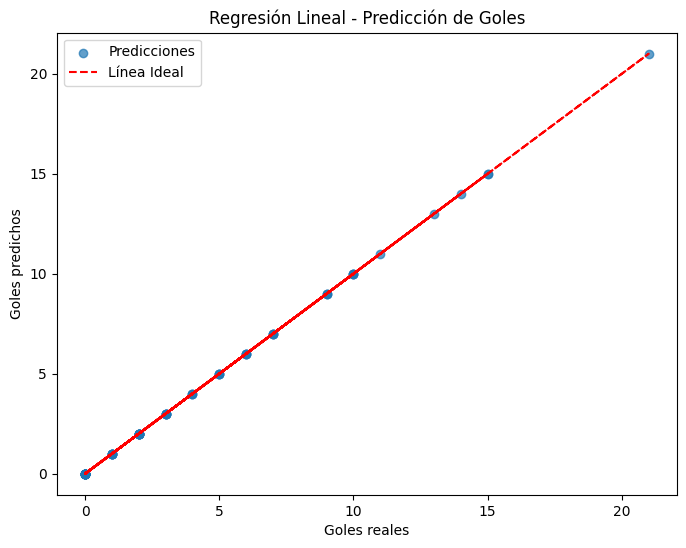

In [35]:
# Regresión Lineal - Real vs Predicción
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, label="Predicciones")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Línea Ideal")
plt.xlabel("Goles reales")
plt.ylabel("Goles predichos")
plt.title("Regresión Lineal - Predicción de Goles")
plt.legend()
plt.show()

## **Clasificación Binaria Multiclase**

Clasificación Binaria - Evaluación
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      1.00      1.00         7
         2.0       1.00      1.00      1.00        10
         3.0       1.00      1.00      1.00         6
         4.0       0.75      1.00      0.86         3
         5.0       1.00      0.75      0.86         4
         6.0       1.00      1.00      1.00         4
         7.0       1.00      1.00      1.00         4
         8.0       0.00      0.00      0.00         0
         9.0       1.00      0.67      0.80         3
        10.0       1.00      1.00      1.00         4
        11.0       1.00      1.00      1.00         1
        13.0       1.00      1.00      1.00         1
        14.0       1.00      1.00      1.00         1
        15.0       1.00      1.00      1.00         2
        21.0       1.00      1.00      1.00         1

    accuracy                           0.97  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


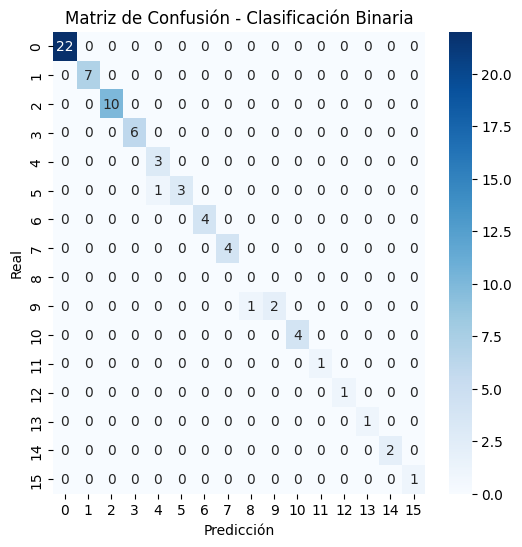

In [41]:
# Entrenar el modelo
clf_bin = RandomForestClassifier(n_estimators=100, random_state=42)
clf_bin.fit(X_train, y_train)

# Realizar la predicción
y_pred_bin = clf_bin.predict(X_test)

# Evaluar y mostrar resultados
print("Clasificación Binaria - Evaluación")
print(classification_report(y_test, y_pred_bin))
print(confusion_matrix(y_test, y_pred_bin))

# Graficar la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Clasificación Binaria')
plt.show()

## **Clustering con K-Means**

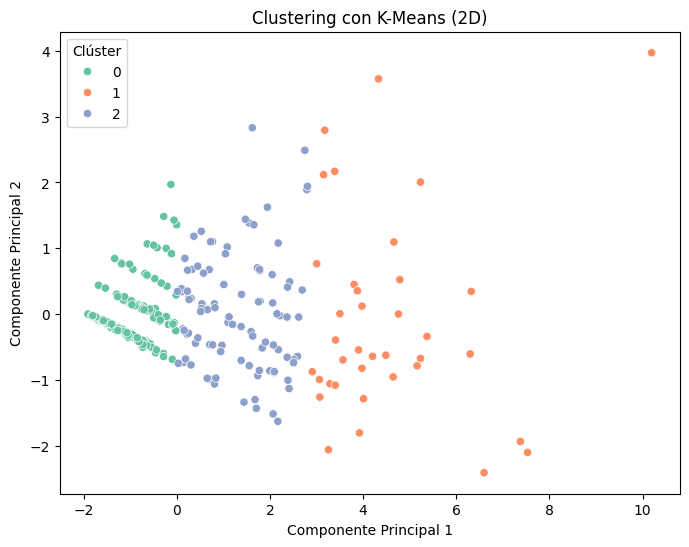

In [42]:
# Reducir las dimensiones para la visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(delanteros_scaled)

# Clustering - Visualización en 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=delanteros['cluster'], palette='Set2')
plt.title('Clustering con K-Means (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()

## **Redes neuronale y DeepLearning**

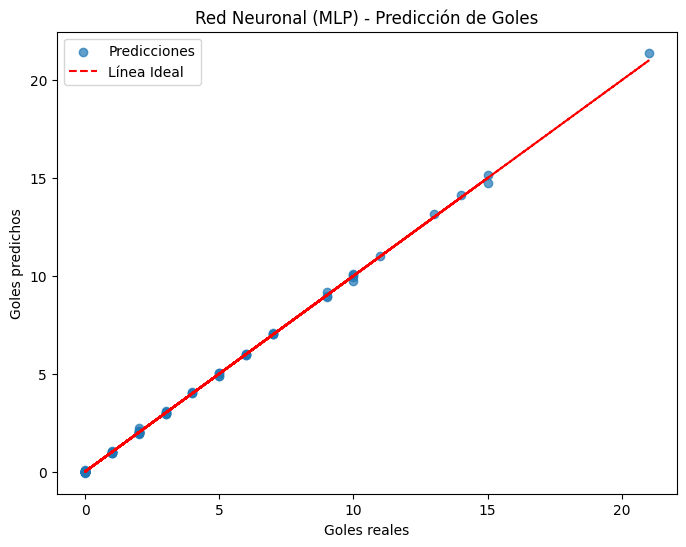

In [43]:
# Red Neuronal - Real vs Predicción
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.7, label="Predicciones")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Línea Ideal")
plt.xlabel("Goles reales")
plt.ylabel("Goles predichos")
plt.title("Red Neuronal (MLP) - Predicción de Goles")
plt.legend()
plt.show()